## Homework 2 - Machine Learning Pipeline

In [257]:
% run util.py
% matplotlib inline

MonthlyIncome 7974
NumberOfDependents 1037


In [75]:
data = read_file('data/credit-data.csv', 'csv', 'PersonID') 

In [76]:
d = read_file('data/Data Dictionary.xls', 'excel')

In [77]:
d = create_data_dic(d)

In [263]:
d

{'DebtRatio': 'Monthly debt payments, alimony,living costs divided by monthy gross income',
 'MonthlyIncome': 'Monthly income',
 'NumberOfDependents': 'Number of dependents in family excluding themselves (spouse, children etc.)',
 'NumberOfOpenCreditLinesAndLoans': 'Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)',
 'NumberOfTime30-59DaysPastDueNotWorse': 'Number of times borrower has been 30-59 days past due but no worse in the last 2 years.',
 'NumberOfTime60-89DaysPastDueNotWorse': 'Number of times borrower has been 60-89 days past due but no worse in the last 2 years.',
 'NumberOfTimes90DaysLate': 'Number of times borrower has been 90 days or more past due.',
 'NumberRealEstateLoansOrLines': 'Number of mortgage and real estate loans including home equity lines of credit',
 'RevolvingUtilizationOfUnsecuredLines': 'Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans d

In [44]:
data.index

Int64Index([ 98976,  98991,  99012,  99023,  99027,  99033,  99044,  99048,
             99056,  99058,
            ...
            123667, 123679, 123687, 123689, 123714, 123722, 123729, 123730,
            123739, 123753],
           dtype='int64', name='PersonID', length=41016)

In [183]:
def discretize_var(df, col, inc):
    df[col] = df[col].astype(int)
    lb = df[col].min() // inc
    ub = df[col].max() // inc + 2
    boundaries = range(lb * inc, ub * inc, inc)
    col_bin = "{}_bin".format(col)
    df[col_bin] = pd.cut(df[col], bins=boundaries,
                         labels=range(len(boundaries)-1),
                         include_lowest=True, right=True)

In [187]:
discretize_var(df, 'age', 10)

In [190]:
df.age_bin.unique()

[3, 5, 2, 1, 0, 4, 6, 7, 8]
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8]

In [193]:
df.MonthlyIncome.describe()

count    3.304200e+04
mean     6.578996e+03
std      1.344683e+04
min      0.000000e+00
25%      3.333000e+03
50%      5.250000e+03
75%      8.055750e+03
max      1.794060e+06
Name: MonthlyIncome, dtype: float64

/Users/hyeyeonchang/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/hyeyeonchang/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


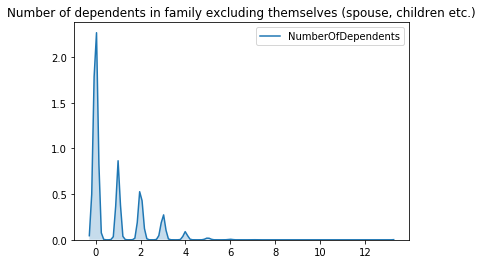

In [231]:
density_plot(data, 'NumberOfDependents', d)

In [248]:
impute_missing(df, "NumberOfDependents", 'median')

In [249]:
check_missing(df)

MonthlyIncome 7974
NumberOfDependents 1037


In [251]:
df["NumberOfDependents"].isnull().any()

True

In [252]:
df.MonthlyIncome.apply()

6578.995732703832

In [260]:
df.MonthlyIncome.max()

1794060.0

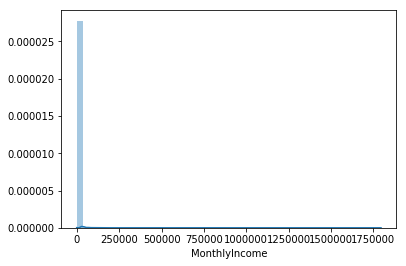

In [262]:
sns.distplot(df.MonthlyIncome)

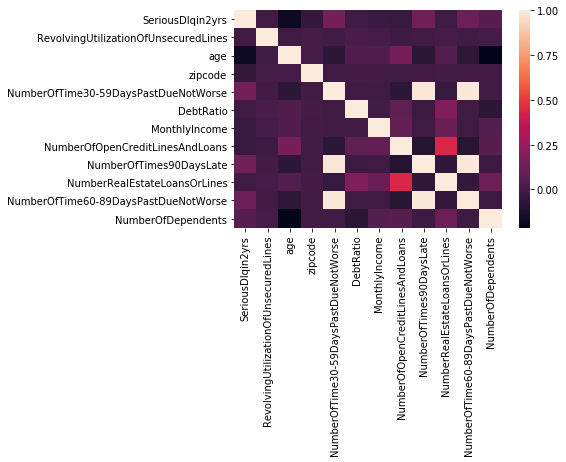

In [261]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()